## Problem 1

We originally have x1, x2 and we transform to $x_1^a$ and $x_2^a$, where $1 \leq a, b\leq 10$. Then we have the cross terms $x_1 x_2$, so 30. E. 

## Problem 2

Average of logistic regressions could be linear or constant, given some negative and positive weights. So D.

## Problem 3

If you only have one hypothesis, you cannot determine whether overfitting is happening in this way, rather you might want to look at Ein and Eout over training or something. D.

## Problem 4

D. ABC are obviously wrong, and If the targets are very noisy (high variance) then stochastic noise is bigger.

## Problem 5

This is just A. If the optimal solution lies within the solution area, then we just choose it. The bounds don't matter

## Problem 6

Soft-order is like weight decay. You make the error "larger" with the lambda term, such as with L2. That means the weights decay more because you "augmented" the error function

## Problem 7

In [1]:
## Loading in some 

import pandas as pd
import numpy as np

train = pd.read_table("http://www.amlbook.com/data/zip/features.train", delim_whitespace = True, header = None)
test = pd.read_table("http://www.amlbook.com/data/zip/features.test", delim_whitespace = True, header = None)
col_names = ['digit', 'intensity', 'symmetry']
train.columns = col_names
test.columns = col_names

In [11]:
## This L2 regularized linear regression is Ridge Regression
from sklearn import linear_model

def E_in(guess, Y):
    return np.mean(guess != Y)
# Train a one v all classifier for some number n
def one_v_all(train, n, lam):
    Y = train['digit']
    X = train.drop(['digit'], axis = 1)
    Y = np.where(Y == n, 1, -1)
    
    reg = linear_model.Ridge(alpha = lam)
    reg.fit(X, Y)
    guess = np.sign(reg.predict(X))
    error = E_in(guess, Y)
    return error

for i in range(5, 10):
    print("E_in for {}: {}".format(i, one_v_all(train, i, 1)))
    
## D

E_in for 5: 0.07625840076807022
E_in for 6: 0.09107118365107666
E_in for 7: 0.08846523110684405
E_in for 8: 0.07433822520916199
E_in for 9: 0.08832807570977919


## Problem 8

In [27]:
## All the answers concern out of sample performance, so we need to set up test set framework
tsfm_test = test.copy()
tsfm_test['z3'] = tsfm_test['intensity'] * tsfm_test['symmetry']
tsfm_test['z4'] = tsfm_test['intensity'] ** 2
tsfm_test['z5'] = tsfm_test['symmetry'] ** 2

## Need to transform the data a bit
tsfm_train = train.copy()
tsfm_train['z3'] = tsfm_train['intensity'] * tsfm_train['symmetry']
tsfm_train['z4'] = tsfm_train['intensity'] ** 2
tsfm_train['z5'] = tsfm_train['symmetry'] ** 2


def one_v_all_test(train, test, n, lam):
    Y = train['digit']
    X = train.drop(['digit'], axis = 1)
    Y = np.where(Y == n, 1, -1)
    
    Ytest = test['digit']
    Xtest = test.drop(['digit'], axis = 1)
    Ytest = np.where(Ytest == n, 1, -1)
    
    reg = linear_model.Ridge(alpha = lam)
    reg.fit(X, Y)
    guess = np.sign(reg.predict(Xtest))
    error = E_in(guess, Ytest)
    
    return error

In [29]:


for i in range(5):
    print("E_in for {}: {}".format(i, one_v_all_test(tsfm_train, tsfm_test, i, 1)))

## B

E_in for 0: 0.10662680617837568
E_in for 1: 0.02192326856003986
E_in for 2: 0.09865470852017937
E_in for 3: 0.08271051320378675
E_in for 4: 0.09965122072745392


## Problem 9

In [21]:
E_out = []
E_out_tsfm = []
for i in range(0, 10):
    e_out = one_v_all_test(train, test, i, 1)
    print("E_out for {}, no transform: {}".format(i, e_out))
    E_out.append(e_out)
    
    e_out = one_v_all_test(tsfm_train, tsfm_test, i, 1)
    print("E_out for {}, with transform: {}".format(i, e_out))
    E_out_tsfm.append(e_out)

E_out for 0, no transform: 0.11509715994020926
E_out for 0, with transform: 0.10662680617837568
E_out for 1, no transform: 0.02242152466367713
E_out for 1, with transform: 0.02192326856003986
E_out for 2, no transform: 0.09865470852017937
E_out for 2, with transform: 0.09865470852017937
E_out for 3, no transform: 0.08271051320378675
E_out for 3, with transform: 0.08271051320378675
E_out for 4, no transform: 0.09965122072745392
E_out for 4, with transform: 0.09965122072745392
E_out for 5, no transform: 0.07972097658196313
E_out for 5, with transform: 0.07922272047832586
E_out for 6, no transform: 0.08470353761833582
E_out for 6, with transform: 0.08470353761833582
E_out for 7, no transform: 0.07324364723467862
E_out for 7, with transform: 0.07324364723467862
E_out for 8, no transform: 0.08271051320378675
E_out for 8, with transform: 0.08271051320378675
E_out for 9, no transform: 0.08819133034379671
E_out for 9, with transform: 0.08819133034379671


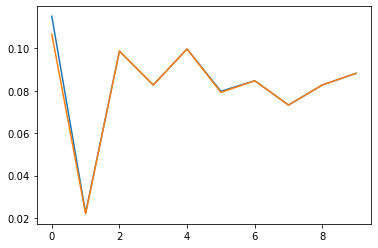

In [26]:
import matplotlib.pyplot as plt

ind = np.arange(0, 10)
plt.plot(ind, E_out)
plt.plot(ind, E_out_tsfm)

## The rest are all wrong according to our findings. E is correct. 

## Problem 10

In [36]:

def one_v_one(train, test, a, b, lam):
    train = train[(train['digit'] == a) | (train['digit'] == b)]
    Y = train['digit']
    X = train.drop(['digit'], axis = 1)
    Y = np.where(Y == a, 1, -1)
    
    test = test[(test['digit'] == a) | (test['digit'] == b)]
    Ytest = test['digit']
    Xtest = test.drop(['digit'], axis = 1)
    Ytest = np.where(Ytest == a, 1, -1)
    
    reg = linear_model.Ridge(alpha = lam)
    reg.fit(X, Y)
    guess = np.sign(reg.predict(X))
    ein = E_in(guess, Y)
    
    guess = np.sign(reg.predict(Xtest))
    eout = E_in(guess, Ytest)
    
    return ein, eout

In [38]:
lams = [0.01, 1]

for lam in lams:
    ein, eout = one_v_one(tsfm_train, tsfm_test, 1, 5, lam)
    print("E_in: {}, E_out: {}".format(ein, eout))
    
## When lam = 0.01, doing worse on E_out, doing too well on E_in, so overfitting (relatively). A.

E_in: 0.004484304932735426, E_out: 0.02830188679245283
E_in: 0.005124919923126201, E_out: 0.025943396226415096


## Problem 11

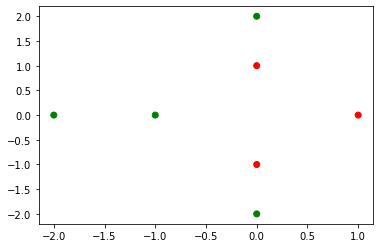

In [45]:
# Writing in the training data
X = np.array([[1, 0], [0, 1], [0, -1], [-1, 0], [0, 2], [0, -2], [-2, 0]])
Y = np.array([-1, -1, -1, +1, +1, +1, +1])
color = ['red' if x == -1 else 'green' for x in Y]
plt.scatter(X[:, 0], X[:, 1], color= color)

In [51]:
Z = np.zeros((X.shape))
Z[:, 0] = X[:, 0] * -2 + X[:, 1] ** 2 - 1
Z[:, 1] = X[:, 1] * -2 + X[:, 0] ** 2 - 1

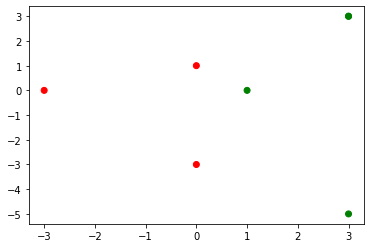

In [52]:
Y = np.array([-1, -1, -1, +1, +1, +1, +1])
color = ['red' if x == -1 else 'green' for x in Y]
plt.scatter(Z[:, 0], Z[:, 1], color= color)

In [53]:
## We want the hyperplane that goes up and down, like z1 = 0.5. To get that we need w1 = 1, w2 = 0 (cuz we don't care what w2 is) and b = -0.5
# Choose C.

## Problem 12

In [58]:
from sklearn import svm

clf = svm.SVC(C = 10000, gamma = 1, kernel = 'poly', coef0 =1, degree = 2 )
clf.fit(X, Y)
clf.n_support_

# C

array([2, 3], dtype=int32)

## Problem 13

In [68]:
## Need to set up K means (RBF) model as well as RBF kernel SVM

import random
# First need to generate data:
def generate_point():
    x, y = random.uniform(-1, 1), random.uniform(-1, 1)
    return (x, y)

class Data:

    def target_function(self, x):
        return np.sign(x[1] - x[0] + 0.25 * np.sin(np.pi* x[0]))


    def __init__(self, num_points):
        p0 = generate_point()
        p1 = generate_point()
        self.target_m = (p1[1] - p0[1]) / (p1[0] - p0[0])
        self.target_b = p0[1] - self.target_m * p0[0]

        self.X = []
        self.Y = []
        for i in range(num_points):
            pt = generate_point()
            self.X.append(pt)
            self.Y.append(self.target_function(pt))

    def plot(self):
        cs = ["red" if y > 0 else "blue" for y in self.Y]
        plt.scatter([x[0] for x in self.X], [x[1] for x in self.X], c=cs)
        plt.gca().set_aspect(1)
        plt.xlim([-1, 1])
        plt.ylim([-1, 1])
        plt.title("Target function")
        plt.show()
        

In [81]:
count = 0
for i in range(1000):
    d = Data(100)

    clf = svm.SVC(C = 10000, kernel = 'rbf', gamma = 1.5)
    X = np.array(d.X)
    clf.fit(X, d.Y)
    guess = clf.predict(X)

    ein = np.mean(guess != d.Y)
    if ein == 0:
        count += 1

count/1000

## A

1.0

## Problem 14

In [130]:
## Need to implement a regular RBF function, this isn't given. We can assume we have the centers from KMeans though.

class regularRBF:
    
    def __init__(self, X, Y, mu, gamma):
        self.X = np.array(X)
        self.Y = Y
        # Mu is a k x 2 array
        self.mu = mu
        self.gamma = gamma
        self.w = len(mu)
        
    def compute_phi(self, X, mu):
        
        k = len(mu)
        phi = np.zeros((len(X), len(mu)))
        for i in range(k):
            temp = X - mu[i]
            col = temp[:, 0] ** 2 + temp[:, 1] ** 2
            col = np.exp(-self.gamma * col)
            phi[:, i] = col
        return phi
    
    def fit(self):
        phi = self.compute_phi(self.X, self.mu)
        y = self.Y
        p_inverse = np.dot(np.linalg.inv(np.dot(np.transpose(phi), phi)) , np.transpose(phi))
        self.w = np.dot(p_inverse, y)
        
    def predict(self, X, mu):
        X = np.array(X)
        phi = self.compute_phi(X, mu)
        guess = np.dot(phi, self.w)
        guess = np.sign(guess)
        return guess

In [149]:
from sklearn.cluster import KMeans

# First train the models

d = Data(100)

# This is the SVM with rbf kernel
clf = svm.SVC(C = 10000, kernel = 'rbf', gamma = 1.5)
X = np.array(d.X)
clf.fit(X, d.Y)

# This is the regular RBF model
kmeans = KMeans(n_clusters = 9, random_state = 11).fit(d.X)
mu = kmeans.cluster_centers_
rbf = regularRBF(d.X, d.Y, mu, 1.5)
rbf.fit()

# generate new data for testing
svm_wins = 0
for i in range(10000):
    d = Data(100)
    
    svm_guess = clf.predict(d.X)
    
    rbf_guess = rbf.predict(d.X, mu)
    
    svm_e = E_in(svm_guess, d.Y)
    rbf_e = E_in(rbf_guess, d.Y)
    
    if svm_e < rbf_e:
        svm_wins += 1
        
svm_wins/10000

## Ran this a few times (not shown) but always greater than 75 for n = 100000. E

0.9772

## Problem 15

In [151]:
d = Data(100)

# This is the SVM with rbf kernel
clf = svm.SVC(C = 10000, kernel = 'rbf', gamma = 1.5)
X = np.array(d.X)
clf.fit(X, d.Y)

# This is the regular RBF model
kmeans = KMeans(n_clusters = 12, random_state = 11).fit(d.X)
mu = kmeans.cluster_centers_
rbf = regularRBF(d.X, d.Y, mu, 1.5)
rbf.fit()

# generate new data for testing
svm_wins = 0
for i in range(10000):
    d = Data(100)
    
    svm_guess = clf.predict(d.X)
    
    rbf_guess = rbf.predict(d.X, mu)
    
    svm_e = E_in(svm_guess, d.Y)
    rbf_e = E_in(rbf_guess, d.Y)
    
    if svm_e < rbf_e:
        svm_wins += 1
        
svm_wins/10000

# Writing adaptible code is good! D.

0.7722

## Problem 16

In [164]:

## Run diffrent clutsers
for i in range(10):
    d = Data(100)

    k1 = KMeans(n_clusters = 9, random_state = 11).fit(d.X)
    k2 = KMeans(n_clusters = 12, random_state = 11).fit(d.X)

    rbf9 = regularRBF(d.X, d.Y, k1.cluster_centers_, 1.5)
    rbf12 = regularRBF(d.X, d.Y, k2.cluster_centers_, 1.5)

    rbf9.fit()
    rbf12.fit()

    # Compute E_in
    guess = rbf9.predict(d.X, k1.cluster_centers_)
    ein = E_in(guess, d.Y)
    print("E_in (K=9) {}".format(ein))

    guess = rbf12.predict(d.X, k2.cluster_centers_)
    ein = E_in(guess, d.Y)
    print("E_in (K=12) {}".format(ein))


    # Compute E_out
    # generate new data
    d = Data(100)


    guess = rbf9.predict(d.X, k1.cluster_centers_)
    eout = E_in(guess, d.Y)
    print("E_out (K=9) {}".format(eout))

    guess = rbf12.predict(d.X, k2.cluster_centers_)
    eout = E_in(guess, d.Y)
    print("E_out (K=12) {}".format(eout))
    print("\n")


## D

E_in (K=9) 0.04
E_in (K=12) 0.02
E_out (K=9) 0.08
E_out (K=12) 0.06


E_in (K=9) 0.06
E_in (K=12) 0.03
E_out (K=9) 0.06
E_out (K=12) 0.03


E_in (K=9) 0.04
E_in (K=12) 0.02
E_out (K=9) 0.03
E_out (K=12) 0.03


E_in (K=9) 0.03
E_in (K=12) 0.02
E_out (K=9) 0.06
E_out (K=12) 0.05


E_in (K=9) 0.08
E_in (K=12) 0.06
E_out (K=9) 0.11
E_out (K=12) 0.1


E_in (K=9) 0.02
E_in (K=12) 0.03
E_out (K=9) 0.01
E_out (K=12) 0.06


E_in (K=9) 0.05
E_in (K=12) 0.02
E_out (K=9) 0.09
E_out (K=12) 0.06


E_in (K=9) 0.03
E_in (K=12) 0.01
E_out (K=9) 0.04
E_out (K=12) 0.02


E_in (K=9) 0.05
E_in (K=12) 0.03
E_out (K=9) 0.05
E_out (K=12) 0.03


E_in (K=9) 0.01
E_in (K=12) 0.01
E_out (K=9) 0.06
E_out (K=12) 0.05




In [167]:
## same idea, just need to change gamma instead


for i in range(10):
    d = Data(100)

    k1 = KMeans(n_clusters = 9, random_state = 11).fit(d.X)

    rbf9 = regularRBF(d.X, d.Y, k1.cluster_centers_, 1.5)
    rbf12 = regularRBF(d.X, d.Y, k1.cluster_centers_, 2)

    rbf9.fit()
    rbf12.fit()

    # Compute E_in
    guess = rbf9.predict(d.X, k1.cluster_centers_)
    ein = E_in(guess, d.Y)
    print("E_in (gamma 1.5) {}".format(ein))

    guess = rbf12.predict(d.X, k1.cluster_centers_)
    ein = E_in(guess, d.Y)
    print("E_in (gamma 2) {}".format(ein))


    # Compute E_out
    # generate new data
    d = Data(100)


    guess = rbf9.predict(d.X, k1.cluster_centers_)
    eout = E_in(guess, d.Y)
    print("E_out (gamma 1.5) {}".format(eout))

    guess = rbf12.predict(d.X, k1.cluster_centers_)
    eout = E_in(guess, d.Y)
    print("E_out (gamma 2) {}".format(eout))
    print("\n")

    ## E_in isn't really going up most of hte time, but E_out is going up. C.

E_in (gamma 1.5) 0.02
E_in (gamma 2) 0.02
E_out (gamma 1.5) 0.08
E_out (gamma 2) 0.07


E_in (gamma 1.5) 0.05
E_in (gamma 2) 0.05
E_out (gamma 1.5) 0.07
E_out (gamma 2) 0.07


E_in (gamma 1.5) 0.06
E_in (gamma 2) 0.06
E_out (gamma 1.5) 0.06
E_out (gamma 2) 0.07


E_in (gamma 1.5) 0.03
E_in (gamma 2) 0.03
E_out (gamma 1.5) 0.0
E_out (gamma 2) 0.0


E_in (gamma 1.5) 0.03
E_in (gamma 2) 0.03
E_out (gamma 1.5) 0.04
E_out (gamma 2) 0.04


E_in (gamma 1.5) 0.04
E_in (gamma 2) 0.04
E_out (gamma 1.5) 0.1
E_out (gamma 2) 0.1


E_in (gamma 1.5) 0.03
E_in (gamma 2) 0.03
E_out (gamma 1.5) 0.07
E_out (gamma 2) 0.07


E_in (gamma 1.5) 0.06
E_in (gamma 2) 0.06
E_out (gamma 1.5) 0.03
E_out (gamma 2) 0.04


E_in (gamma 1.5) 0.05
E_in (gamma 2) 0.05
E_out (gamma 1.5) 0.07
E_out (gamma 2) 0.07


E_in (gamma 1.5) 0.05
E_in (gamma 2) 0.05
E_out (gamma 1.5) 0.07
E_out (gamma 2) 0.07




## Problem 18

In [170]:

counts = 0
for i in range(1000):
    d = Data(100)

    k1 = KMeans(n_clusters = 9, random_state = 11).fit(d.X)

    rbf9 = regularRBF(d.X, d.Y, k1.cluster_centers_, 1.5)

    rbf9.fit()

    # Compute E_in
    guess = rbf9.predict(d.X, k1.cluster_centers_)
    ein = E_in(guess, d.Y)
    if ein == 0:
        counts += 1

counts / 1000

## A

0.021

## Problem 19

Basically this just means the probability increased posteriorly. So therefore every point in the target space moves up, sinc we are using a constant hypothesis. B.

## Problem 20

If the real value is any closer to $g_1$, then it will favor $g_1$ more. If it is any closer to $g_2$ it will favor $g_2$ more than average. Therefore it must be at least as good as average.